# **Import Required Libraries**

In [41]:
import pandas as pd
import numpy as np

# **Load the Dataset**

In [42]:
# Load the Customer Call List dataset
df = pd.read_csv("Customer Call List.csv")



# **top 5 values**

In [43]:
# View top rows
print(df.head())




   CustomerID First_Name Last_Name  Phone_Number  \
0        1001      Frodo   Baggins  123-545-5421   
1        1002       Abed     Nadir  123/643/9775   
2        1003     Walter    /White    7066950392   
3        1004     Dwight   Schrute  123-543-2345   
4        1005        Jon      Snow  876|678|3469   

                                 Address Paying Customer Do_Not_Contact  \
0                  123 Shire Lane, Shire             Yes             No   
1                    93 West Main Street              No            Yes   
2                     298 Drugs Driveway               N            NaN   
3  980 Paper Avenue, Pennsylvania, 18503             Yes              Y   
4                       123 Dragons Road               Y             No   

   Not_Useful_Column  
0               True  
1              False  
2               True  
3               True  
4               True  


# **info of dataset**

In [44]:
# Dataset structure
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         21 non-null     int64 
 1   First_Name         21 non-null     object
 2   Last_Name          20 non-null     object
 3   Phone_Number       19 non-null     object
 4   Address            21 non-null     object
 5   Paying Customer    21 non-null     object
 6   Do_Not_Contact     17 non-null     object
 7   Not_Useful_Column  21 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.3+ KB
None


# **describe of dataset**

In [45]:
# Statistical summary
print(df.describe(include='all'))

         CustomerID First_Name  Last_Name  Phone_Number  \
count     21.000000         21         20            19   
unique          NaN         19         19             7   
top             NaN        Ron  Skywalker  876|678|3469   
freq            NaN          2          2             5   
mean    1010.952381        NaN        NaN           NaN   
std        6.127611        NaN        NaN           NaN   
min     1001.000000        NaN        NaN           NaN   
25%     1006.000000        NaN        NaN           NaN   
50%     1011.000000        NaN        NaN           NaN   
75%     1016.000000        NaN        NaN           NaN   
max     1020.000000        NaN        NaN           NaN   

                            Address Paying Customer Do_Not_Contact  \
count                            21              21             17   
unique                           20               5              4   
top     910 Tatooine Road, Tatooine             Yes             No   
freq       

# **Standardize Column Names**

In [46]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

print("Updated Columns:", df.columns)


Updated Columns: Index(['customerid', 'first_name', 'last_name', 'phone_number', 'address',
       'paying_customer', 'do_not_contact', 'not_useful_column'],
      dtype='object')


# **Remove Special Characters from Last Name**

In [47]:


# Remove special characters from 'Last Name' column
df['last_name'] = (
    df['last_name']
    .astype(str)                       # Ensure string type
    .str.replace(r'[^A-Za-z ]', '', regex=True)  # Keep only letters & spaces
    .str.strip()                       # Remove extra spaces
)
print("✅ Special characters removed from 'Last Name' column")
df['last_name']


✅ Special characters removed from 'Last Name' column


,last_name
0,Baggins
1,Nadir
2,White
3,Schrute
4,Snow
5,Swanson
6,Winger
7,Holmes
8,nan
9,Parker


# **Clean & Format Phone Numbers**

In [48]:
df['phone_number'] = (
    df['phone_number']
    .astype(str)
    # Remove all non-numeric characters
    .str.replace(r'\D', '', regex=True)
    # Keep only first 10 digits (optional safety)
    .str[:10]
    # Add hyphen after 3rd and 6th digits
    .str.replace(r'(\d{3})(\d{3})(\d+)', r'\1-\2-\3', regex=True)
)

print(df[['phone_number']].head())



   phone_number
0  123-545-5421
1  123-643-9775
2  706-695-0392
3  123-543-2345
4  876-678-3469


# **Split Address Column into Multiple Columns**

In [49]:
# Split Address column
address_split = df['address'].astype(str).str.split(',', expand=True)

# Rename columns dynamically
address_split.columns = [f'address{i+1}' for i in range(address_split.shape[1])]

# Remove extra spaces
address_split = address_split.apply(lambda x: x.str.strip())

# Drop original Address column and add new ones
df = df.drop(columns=['address']).join(address_split)

print(df.head())


   customerid first_name last_name  phone_number paying_customer  \
0        1001      Frodo   Baggins  123-545-5421             Yes   
1        1002       Abed     Nadir  123-643-9775              No   
2        1003     Walter     White  706-695-0392               N   
3        1004     Dwight   Schrute  123-543-2345             Yes   
4        1005        Jon      Snow  876-678-3469               Y   

  do_not_contact  not_useful_column             address1      address2  \
0             No               True       123 Shire Lane         Shire   
1            Yes              False  93 West Main Street          None   
2            NaN               True   298 Drugs Driveway          None   
3              Y               True     980 Paper Avenue  Pennsylvania   
4             No               True     123 Dragons Road          None   

  address3  
0     None  
1     None  
2     None  
3    18503  
4     None  


# **Convert Y/N to Yes/No**

In [50]:
df['do_not_contact'] = (
    df['do_not_contact']
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({'Y': 'Yes', 'N': 'No'})
)
print(df['do_not_contact'].value_counts())
df['do_not_contact'].head()



do_not_contact
NO     9
NAN    4
No     4
YES    3
Yes    1
Name: count, dtype: int64


,do_not_contact
0,NO
1,YES
2,NAN
3,Yes
4,NO


# **Convert Y/N to Yes/No**

In [51]:
df['paying_customer'] = (
    df['paying_customer']
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({'Y': 'Yes', 'N': 'No'})
)
print(df['paying_customer'].value_counts())
df['paying_customer'].head()



paying_customer
YES    11
NO      3
No      3
Yes     3
N/A     1
Name: count, dtype: int64


,paying_customer
0,YES
1,NO
2,No
3,YES
4,Yes


# **Handle Missing Values (Automated Rule)**

Rule:

Null > 12% → fill (median/mode)

Null ≤ 12% → drop

In [52]:
# Handle missing values automatically
for col in df.columns:
    null_pct = df[col].isnull().mean() * 100

    if null_pct > 12:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df.dropna(subset=[col], inplace=True)


/tmp/ipython-input-1440897462.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# **Remove Duplicate Records**

In [53]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


# **Trim All Text Columns**

In [54]:
# Remove extra spaces from all text columns
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    df[col] = df[col].str.strip()


# **Final Dataset Check**

In [55]:
# Final preview and info

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customerid         20 non-null     int64 
 1   first_name         20 non-null     object
 2   last_name          20 non-null     object
 3   phone_number       20 non-null     object
 4   paying_customer    20 non-null     object
 5   do_not_contact     20 non-null     object
 6   not_useful_column  20 non-null     bool  
 7   address1           20 non-null     object
 8   address2           20 non-null     object
 9   address3           20 non-null     object
dtypes: bool(1), int64(1), object(8)
memory usage: 1.6+ KB


In [56]:
df.head()

,customerid,first_name,last_name,phone_number,paying_customer,do_not_contact,not_useful_column,address1,address2,address3
0,1001,Frodo,Baggins,123-545-5421,YES,NO,True,123 Shire Lane,Shire,18503
1,1002,Abed,Nadir,123-643-9775,NO,YES,False,93 West Main Street,Pennsylvania,18503
2,1003,Walter,White,706-695-0392,No,NAN,True,298 Drugs Driveway,Pennsylvania,18503
3,1004,Dwight,Schrute,123-543-2345,YES,Yes,True,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,876-678-3469,Yes,NO,True,123 Dragons Road,Pennsylvania,18503


# **Save the Cleaned Dataset**

In [57]:
# Save cleaned data to a new CSV file
df.to_csv("Customer_Call_List_Cleaned.csv", index=False)

print("✅ Data cleaning completed successfully!")


✅ Data cleaning completed successfully!


# **Data Visualization**

# Do Not Contact Distribution

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

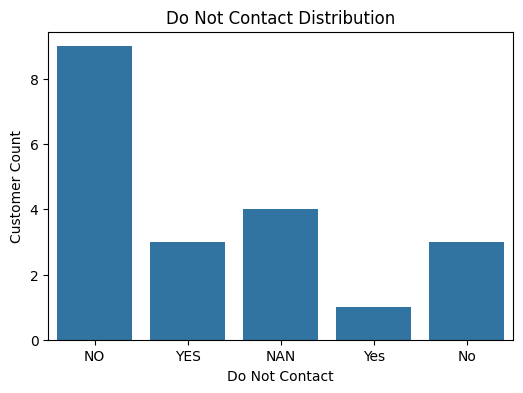

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='do_not_contact')
plt.title("Do Not Contact Distribution")
plt.xlabel("Do Not Contact")
plt.ylabel("Customer Count")
plt.show()


# Paying vs Non-Paying Customers

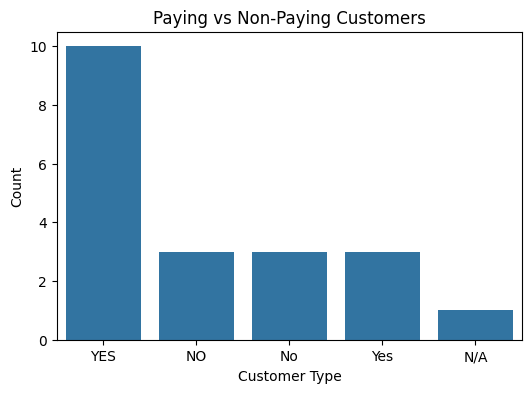

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='paying_customer')
plt.title("Paying vs Non-Paying Customers")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()


# Paying Customers vs Do Not Contact (Comparison)

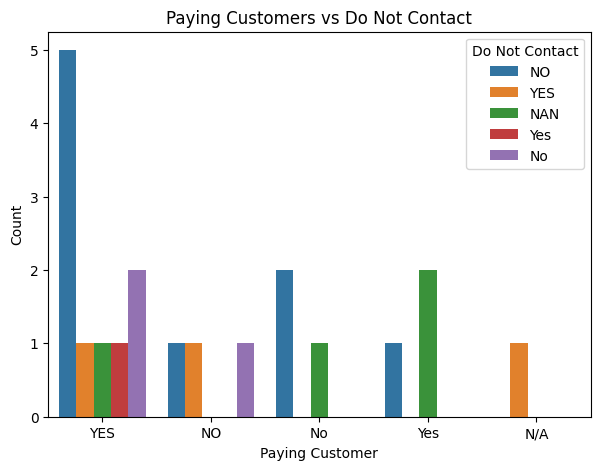

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='paying_customer', hue='do_not_contact')
plt.title("Paying Customers vs Do Not Contact")
plt.xlabel("Paying Customer")
plt.ylabel("Count")
plt.legend(title="Do Not Contact")
plt.show()


# Top States by Customer Count

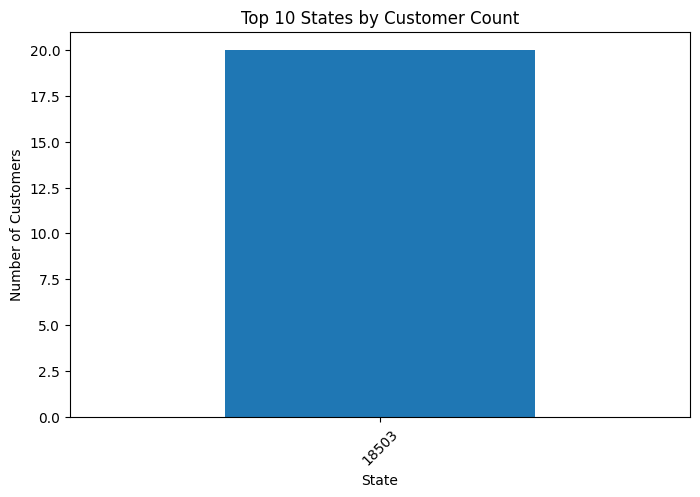

In [65]:
top_states = df['address3'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_states.plot(kind='bar')
plt.title("Top 10 States by Customer Count")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


# Customer Distribution by City

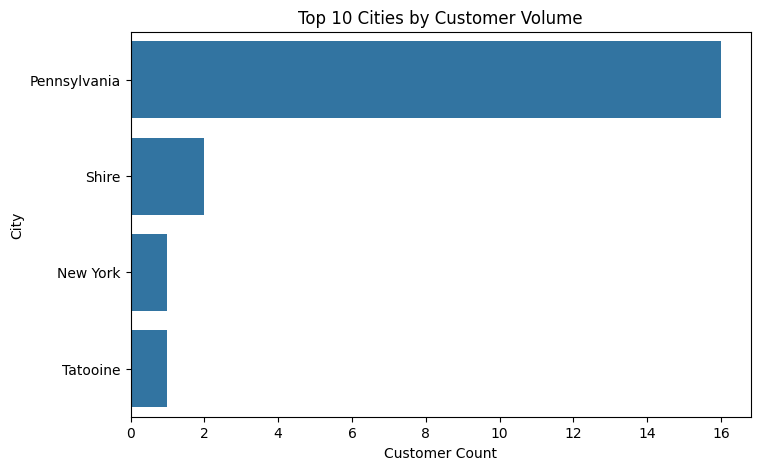

In [66]:
top_cities = df['address2'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Customer Volume")
plt.xlabel("Customer Count")
plt.ylabel("City")
plt.show()


# Paying Customer Percentage (Pie Chart)

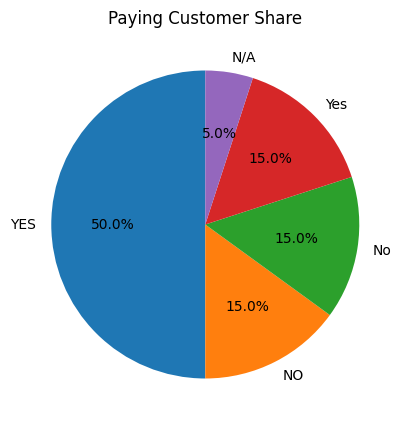

In [67]:
paying_counts = df['paying_customer'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    paying_counts,
    labels=paying_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Paying Customer Share")
plt.show()


# Data Quality Check – Missing Values Heatmap

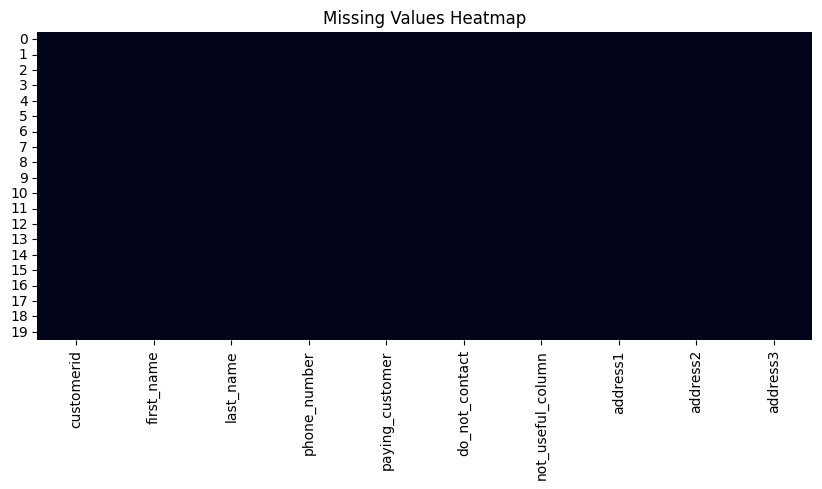

In [68]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()
